# Part c and d 

In [ ]:
from functions import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer
from sklearn.pipeline import make_pipeline
import matplotlib.style as mplstyle
mplstyle.use(['ggplot', 'fast'])

# plt.rcParams.update({
#     "text.usetex": True,       
#     "font.family": "serif",    
#     "font.size": 10, 
# })

seed = np.random.seed(2018)

# Hyperparameters from part a and b
polynomial_degree     = 201
number_of_data_points = 1000
lambda_               = 1e-5

learning_rate = 0.01
n_iterations  = 10000
tolerance     = 1e-6
use_tol       = True
beta          = 0.9
beta1         = 0.8
beta2         = 0.9
epsilon       = 1e-8
lambda_       = 0.01
batch_size    = 10

### Using shared functions to create dataset

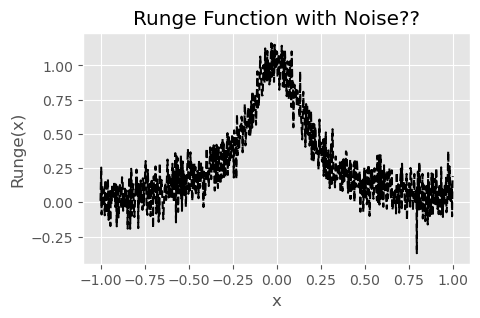

In [2]:
train, test, full = make_data(number_of_data_points, seed)
x, y = full[0], full[1]

plt.figure(figsize=(5, 3))
plt.plot(x, y, color='black', linestyle='--')
plt.title('Runge Function with Noise??')
plt.xlabel('x')
plt.ylabel('Runge(x)')
plt.show()

In [3]:
# We start by splitting the data into training and test sets
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
x_train, x_test, y_train, y_test = train[0], test[0], train[1], test[1]
x_train = x_train.reshape(-1, 1)
x_test  = x_test.reshape(-1, 1)
x = x.reshape(-1, 1)
# Then we scale the data, based on the training data
#scaler = StandardScaler()
#scaler.fit(x_train)
#x_train_scaled = scaler.transform(x_train)
#x_test_scaled  = scaler.transform(x_test)
# And lastly we create the design matrix (polynomial features) without intercept, using the skit-learn function
#X_train = PolynomialFeatures(degree=polynomial_degree, include_bias=True).fit_transform(x_train_scaled)
#X_test  = PolynomialFeatures(degree=polynomial_degree, include_bias=True).fit_transform(x_test_scaled)
#X_train = make_pipeline(
#                PolynomialFeatures(degree=polynomial_degree, include_bias=False),
#                StandardScaler(with_mean=False)
#            )#.fit_transform(x_train_scaled)
#X_test = make_pipeline(
#                PolynomialFeatures(degree=polynomial_degree, include_bias=False),
#                StandardScaler(with_mean=False)
#            )#.fit_transform(x_test_scaled)


''' THIS WORKS WITH SCALING NOW !!! '''
#X_train = PolynomialFeatures(degree=polynomial_degree, include_bias=True).fit_transform(x_train)
#X_test  = PolynomialFeatures(degree=polynomial_degree, include_bias=True).fit_transform(x_test)

poly = PolynomialFeatures(degree=polynomial_degree, include_bias=False)
X_train = poly.fit_transform(x_train)#_scaled)
X_test  = poly.transform(x_test)

scaler  = StandardScaler(with_mean=False)
scaler.fit(X_train) # NB! Should scale based on training data only 
x_train_scaled = scaler.transform(X_train)
x_test_scaled  = scaler.transform(X_test)

X_train = x_train_scaled
X_test = x_test_scaled

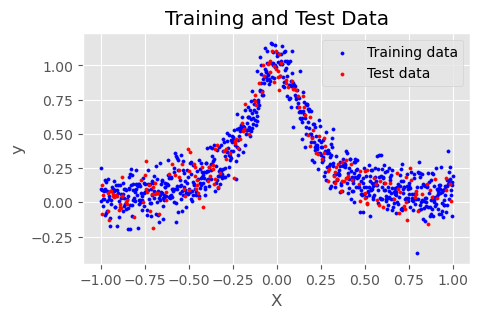

In [4]:
# Plot training data and test data
plt.figure(figsize=(5, 3))
plt.scatter(x_train, y_train, color='blue', s=5, label='Training data')
plt.scatter(x_test,  y_test,  color='red',  s=5, label='Test data')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Training and Test Data')
plt.legend()
plt.show()

## Part c: Writing your own gradient decent code 

Replace now the analytical expressions for the optimal parameters $\theta$ with your own gradient descent code. In this exercise we focus only on the simplest gradient descent approach with a fixed learning rate (excercises from week 37 and lecture notes from week 36).

Study and compare your results from parts a) and b) with your gradient descent approach. Discuss in particular the role of the learning rate.

c:\Users\Ingvild\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
c:\Users\Ingvild\Desktop\FYS-STK-PROJ-1\Project_1_FYSSTK\Code\functions.py:392: RuntimeWarning: overflow encountered in square
  cost = (1/n_samples) * np.sum((X @ theta - y)**2)
c:\Users\Ingvild\Desktop\FYS-STK-PROJ-1\Project_1_FYSSTK\Code\functions.py:394: RuntimeWarning: invalid value encountered in scalar subtract
  if use_tol and i > 0 and abs(cost_history[-2] - cost) < tol:
c:\Users\Ingvild\Desktop\FYS-STK-PROJ-1\Project_1_FYSSTK\Code\functions.py:376: RuntimeWarning: overflow encountered in matmul
  return (2/len(y)) * (X.T @ (X @ beta - y))
c:\Users\Ingvild\Desktop\FYS-STK-PROJ-1\Project_1_FYSSTK\Code\functions.py:392: RuntimeWarning: invalid value encountered in matmul
  cost = (1/n_samples) * np.sum((X @ theta - y)**2)
c:\Users\Ingvild\Desktop\FYS-STK-PROJ-1\Project_1_FYSSTK\Code\functions.py:376: 

OLS Analytical Solution : MSE = 0.076156, R2 = 0.236589
OLS Gradient Descent    : MSE = nan, R2 = nan


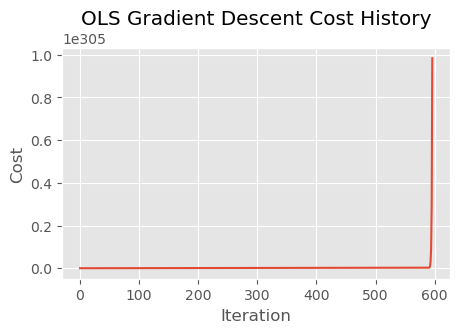

c:\Users\Ingvild\Desktop\FYS-STK-PROJ-1\Project_1_FYSSTK\Code\functions.py:407: RuntimeWarning: overflow encountered in square
  cost = (1/n_samples) * np.sum((X @ theta - y)**2) + alpha * np.sum(theta**2)
c:\Users\Ingvild\Desktop\FYS-STK-PROJ-1\Project_1_FYSSTK\Code\functions.py:409: RuntimeWarning: invalid value encountered in scalar subtract
  if use_tol and i > 0 and abs(cost_history[-2] - cost) < tol:
c:\Users\Ingvild\Desktop\FYS-STK-PROJ-1\Project_1_FYSSTK\Code\functions.py:379: RuntimeWarning: overflow encountered in matmul
  return (2/len(y)) * (X.T @ (X @ beta - y)) + 2 * lambda_ * beta
c:\Users\Ingvild\Desktop\FYS-STK-PROJ-1\Project_1_FYSSTK\Code\functions.py:407: RuntimeWarning: invalid value encountered in matmul
  cost = (1/n_samples) * np.sum((X @ theta - y)**2) + alpha * np.sum(theta**2)
c:\Users\Ingvild\Desktop\FYS-STK-PROJ-1\Project_1_FYSSTK\Code\functions.py:379: RuntimeWarning: invalid value encountered in matmul
  return (2/len(y)) * (X.T @ (X @ beta - y)) + 2 * lam

Ridge Analytical Solution: MSE = 0.146372, R2 = -0.467281
Ridge Gradient Descent:    MSE = nan, R2 = nan


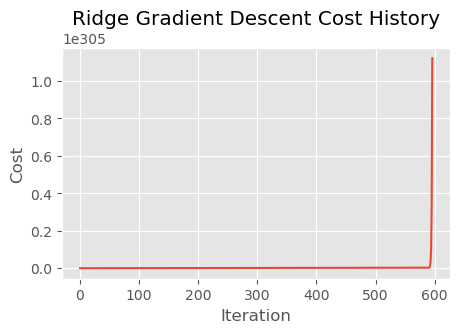

In [5]:
# OLS regression : 
# OLS analytical solution
theta_ols  = OLS_parameters(X_train, y_train)
y_pred_ols = X_test @ theta_ols
mse_ols    = MSE(y_test, y_pred_ols)
r2_ols     = R2(y_test, y_pred_ols)
# Gradient descent solution
theta_gd_ols, cost_history_ols = gradient_descent_ols(X_train, y_train, learning_rate, n_iterations, tolerance, use_tol)
y_pred_gd_ols = X_test @ theta_gd_ols
mse_gd_ols    = MSE(y_test, y_pred_gd_ols)
r2_gd_ols     = R2(y_test, y_pred_gd_ols)
# Print results
print(f"OLS Analytical Solution : MSE = {mse_ols:.6f}, R2 = {r2_ols:.6f}")
print(f"OLS Gradient Descent    : MSE = {mse_gd_ols:.6f}, R2 = {r2_gd_ols:.6f}")
# Plot cost history
plt.figure(figsize=(5, 3))
plt.plot(cost_history_ols)
plt.title("OLS Gradient Descent Cost History")
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.show()

# RIDGE regression : 
# Analytical solution
beta_ridge   = Ridge_parameters(X_train, y_train, lambda_)
y_pred_ridge = X_test @ beta_ridge
mse_ridge    = MSE(y_test, y_pred_ridge)
r2_ridge     = R2(y_test, y_pred_ridge)
# Gradient descent solution
beta_gd_ridge, cost_history_ridge = gradient_descent_ridge(X_train, y_train, lambda_, learning_rate, n_iterations, tolerance, use_tol)
y_pred_gd_ridge = X_test @ beta_gd_ridge
mse_gd_ridge    = MSE(y_test, y_pred_gd_ridge)
r2_gd_ridge     = R2(y_test, y_pred_gd_ridge)
# Print results
print(f"Ridge Analytical Solution: MSE = {mse_ridge:.6f}, R2 = {r2_ridge:.6f}")
print(f"Ridge Gradient Descent:    MSE = {mse_gd_ridge:.6f}, R2 = {r2_gd_ridge:.6f}")
# Plot cost history
plt.figure(figsize=(5, 3))
plt.plot(cost_history_ridge)
plt.title("Ridge Gradient Descent Cost History")
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.show()

In [6]:
# # Plot the results from OLS and Ridge for the entire range of x
# plt.figure(figsize=(10, 7))
# x_plot = np.linspace(-1, 1, number_of_data_points).reshape(-1, 1)
# X_plot = PolynomialFeatures(degree=polynomial_degree, include_bias=False)#.fit_transform(x_plot)
# # Analytical solutions
# y_plot_ols   = X_plot @ theta_ols
# y_plot_ridge = X_plot @ beta_ridge
# # Gradient descent solutions
# y_plot_gd_ols   = X_plot @ theta_gd_ols
# y_plot_gd_ridge = X_plot @ beta_gd_ridge
# plt.plot(x, y_plot_ols, color='blue', label='OLS Prediction', zorder=5, linewidth=2.5)
# plt.plot(x, y_plot_ridge, color='red', label='Ridge Prediction', zorder=5, linewidth=1.5)
# plt.plot(x, y_plot_gd_ols, color='blue', alpha=1, label='GD OLS Prediction', zorder=8, linewidth=2.5, linestyle='--')
# plt.plot(x, y_plot_gd_ridge, color='red', alpha=1, label='GD Ridge Prediction', zorder=8, linewidth=1.5, linestyle='-.')
# plt.plot(x, y, color='black', linestyle=':', label='Runge Function', linewidth=2.5)
# plt.xlabel("x")
# plt.ylabel("y")
# plt.title("Model Predictions vs Runge Function")
# plt.legend()
# plt.show()  

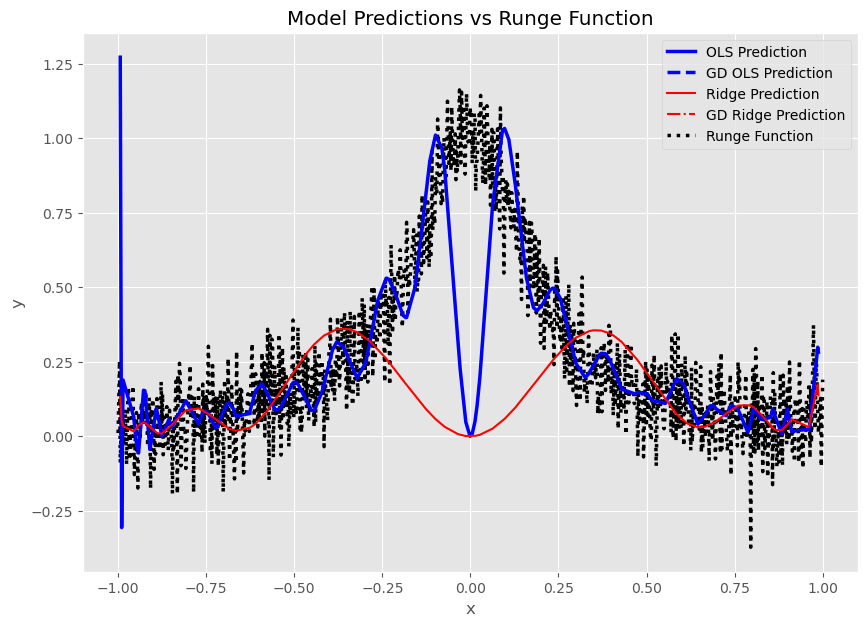

In [7]:
# Plot the results from OLS and Ridge on the test data
plt.figure(figsize=(10, 7))
# Sort x_test and corresponding predictions for better plotting
sort_indices = np.argsort(x_test.flatten())
plt.plot(x_test[sort_indices], y_pred_ols[sort_indices], color='blue', label='OLS Prediction', zorder=5, linewidth=2.5)
plt.plot(x_test[sort_indices], y_pred_gd_ols[sort_indices], color='blue', label='GD OLS Prediction', zorder=8, linewidth=2.5, linestyle='--')
plt.plot(x_test[sort_indices], y_pred_ridge[sort_indices], color='red', label='Ridge Prediction', zorder=5, linewidth=1.5)
plt.plot(x_test[sort_indices], y_pred_gd_ridge[sort_indices], color='red', label='GD Ridge Prediction', zorder=8, linewidth=1.5, linestyle='-.')
# Also plot the true function, however we need to sort x for this
sort_indices_full = np.argsort(x.flatten())
plt.plot(x[sort_indices_full], y[sort_indices_full], color='black', linestyle=':', label='Runge Function', linewidth=2.5)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Model Predictions vs Runge Function")
plt.legend()
plt.show()

## Part d: Including momentum and more advanced ways to update the learning the rate

We keep our focus on OLS and Ridge regression and update our code for
the gradient descent method by including **momentum**, **ADAgrad**,
**RMSprop** and **ADAM** as methods fro iteratively updating your learning
rate. Discuss the results and compare the different methods applied to
the one-dimensional Runge function. The lecture notes from week 37 contain several examples on how to implement these methods.

In [8]:
methods = ['gd', 'momentum', 'adagrad', 'rmsprop', 'adam']

In [9]:
results = {}
for method in methods:
    theta_OLS, cost_history_OLS     = gradient_descent_advanced(X_train, y_train, method=method, lr_method='ols', learning_rate=learning_rate, n_iterations=n_iterations, tol=tolerance, use_tol=use_tol, beta=beta, beta1=beta1, beta2=beta2, epsilon=epsilon, lambda_=lambda_)
    theta_Ridge, cost_history_Ridge = gradient_descent_advanced(X_train, y_train, method=method, lr_method='ridge', learning_rate=learning_rate, n_iterations=n_iterations, tol=tolerance, use_tol=use_tol, beta=beta, beta1=beta1, beta2=beta2, epsilon=epsilon, lambda_=lambda_)
    theta_Lasso, cost_history_Lasso = gradient_descent_advanced(X_train, y_train, method=method, lr_method='lasso', learning_rate=learning_rate, n_iterations=n_iterations, tol=tolerance, use_tol=use_tol, beta=beta, beta1=beta1, beta2=beta2, epsilon=epsilon, lambda_=lambda_)
    y_pred_OLS = X_test @ theta_OLS
    y_pred_Ridge = X_test @ theta_Ridge
    y_pred_Lasso = X_test @ theta_Lasso
    mse_OLS = MSE(y_test, y_pred_OLS)
    r2_OLS = R2(y_test, y_pred_OLS)
    mse_Ridge = MSE(y_test, y_pred_Ridge)
    r2_Ridge = R2(y_test, y_pred_Ridge)
    mse_Lasso = MSE(y_test, y_pred_Lasso)
    r2_Lasso = R2(y_test, y_pred_Lasso)
    results[method] = {
        'theta_OLS'         : theta_OLS,
        'cost_history_OLS'  : cost_history_OLS,
        'mse_OLS'           : mse_OLS,
        'r2_OLS'            : r2_OLS,
        'theta_Ridge'       : theta_Ridge,
        'cost_history_Ridge': cost_history_Ridge,
        'mse_Ridge'         : mse_Ridge,
        'r2_Ridge'          : r2_Ridge,
        'theta_Lasso'       : theta_Lasso,
        'cost_history_Lasso': cost_history_Lasso,
        'mse_Lasso'         : mse_Lasso,
        'r2_Lasso'          : r2_Lasso
    }
    print(f"OLS   : {method}: MSE = {mse_OLS:.6f}, R2 = {r2_OLS:.6f}")
    print(f"Ridge :{method}: MSE = {mse_Ridge:.6f}, R2 = {r2_Ridge:.6f}")
    print(f"Lasso :{method}: MSE = {mse_Lasso:.6f}, R2 = {r2_Lasso:.6f}")
    print()

c:\Users\Ingvild\Desktop\FYS-STK-PROJ-1\Project_1_FYSSTK\Code\functions.py:456: RuntimeWarning: overflow encountered in square
  cost = (1/n_samples) * np.sum((X @ theta - y)**2)
c:\Users\Ingvild\Desktop\FYS-STK-PROJ-1\Project_1_FYSSTK\Code\functions.py:462: RuntimeWarning: invalid value encountered in scalar subtract
  if use_tol and i > 0 and abs(cost_history[-2] - cost) < tol:
c:\Users\Ingvild\Desktop\FYS-STK-PROJ-1\Project_1_FYSSTK\Code\functions.py:456: RuntimeWarning: invalid value encountered in matmul
  cost = (1/n_samples) * np.sum((X @ theta - y)**2)
c:\Users\Ingvild\Desktop\FYS-STK-PROJ-1\Project_1_FYSSTK\Code\functions.py:458: RuntimeWarning: overflow encountered in square
  cost = (1/n_samples) * np.sum((X @ theta - y)**2) + lambda_ * np.sum(theta**2)
c:\Users\Ingvild\Desktop\FYS-STK-PROJ-1\Project_1_FYSSTK\Code\functions.py:458: RuntimeWarning: invalid value encountered in matmul
  cost = (1/n_samples) * np.sum((X @ theta - y)**2) + lambda_ * np.sum(theta**2)
c:\Users\Ing

OLS   : gd: MSE = nan, R2 = nan
Ridge :gd: MSE = nan, R2 = nan
Lasso :gd: MSE = nan, R2 = nan

momentum converged after 3030 iterations.
momentum converged after 1574 iterations.
momentum converged after 236 iterations.
OLS   : momentum: MSE = 0.167857, R2 = -0.682658
Ridge :momentum: MSE = 0.170564, R2 = -0.709787
Lasso :momentum: MSE = 0.176611, R2 = -0.770406

adagrad converged after 415 iterations.
adagrad converged after 412 iterations.
adagrad converged after 154 iterations.
OLS   : adagrad: MSE = 0.182946, R2 = -0.833917
Ridge :adagrad: MSE = 0.182948, R2 = -0.833928
Lasso :adagrad: MSE = 0.183184, R2 = -0.836301

rmsprop converged after 54 iterations.
rmsprop converged after 54 iterations.
rmsprop converged after 113 iterations.
OLS   : rmsprop: MSE = 0.182561, R2 = -0.830056
Ridge :rmsprop: MSE = 0.182561, R2 = -0.830057
Lasso :rmsprop: MSE = 0.181881, R2 = -0.823234

adam converged after 970 iterations.
adam converged after 496 iterations.
adam converged after 431 iterations.

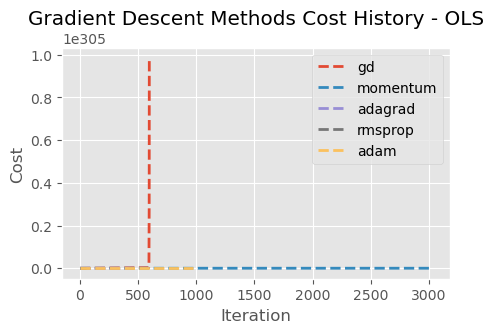

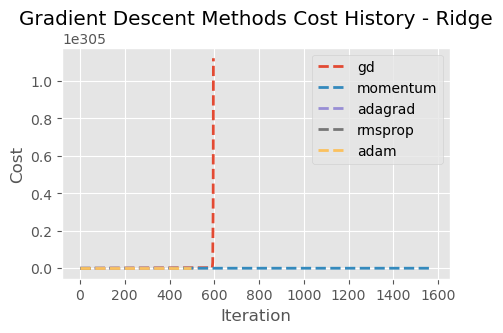

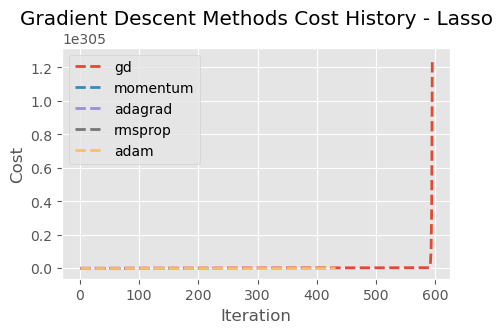

In [10]:
# Plot cost history for all methods
plt.figure(figsize=(5, 3))
for method in methods:
    plt.plot(results[method]['cost_history_OLS'], label=method, linewidth=2, linestyle='--', alpha=1)
plt.title("Gradient Descent Methods Cost History - OLS")
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.legend()
plt.show()

plt.figure(figsize=(5, 3))
for method in methods:
    plt.plot(results[method]['cost_history_Ridge'], label=method, linewidth=2, linestyle='--', alpha=1)
plt.title("Gradient Descent Methods Cost History - Ridge")
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.legend()
plt.show()

plt.figure(figsize=(5, 3))
for method in methods:
    plt.plot(results[method]['cost_history_Lasso'], label=method, linewidth=2, linestyle='--', alpha=1)
plt.title("Gradient Descent Methods Cost History - Lasso")
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.legend()
plt.show()

In [11]:
# # Plot the results from OLS and Ridge for the entire range of x
# plt.figure(figsize=(10, 7))
# x_plot = np.linspace(-1, 1, number_of_data_points).reshape(-1, 1)
# X_plot = PolynomialFeatures(degree=polynomial_degree, include_bias=True).fit_transform(x_plot)
# # Analytical solutions
# y_plot_ols   = X_plot @ theta_ols
# y_plot_ridge = X_plot @ beta_ridge
# # Gradient descent solutions
# y_plot_gd_ols   = X_plot @ theta_gd_ols
# y_plot_gd_ridge = X_plot @ beta_gd_ridge
# plt.plot(x, y_plot_ols, color='blue', label='OLS Prediction', zorder=5, linewidth=2.5)
# plt.plot(x, y_plot_ridge, color='red', label='Ridge Prediction', zorder=5, linewidth=1.5)
# plt.plot(x, y, color='black', linestyle=':', label='Runge Function', linewidth=2.5)
# for method in methods:
#     plt.plot(x, X_plot @ results[method]['theta_OLS'], label=f'GD OLS ({method})', linewidth=1.5, linestyle='--', alpha=0.9)
#     plt.plot(x, X_plot @ results[method]['theta_Ridge'], label=f'GD Ridge ({method})', linewidth=1.5, linestyle='-.', alpha=0.9)
#     plt.plot(x, X_plot @ results[method]['theta_Lasso'], label=f'GD Lasso ({method})', linewidth=1.5, linestyle='-.', alpha=0.9)
# plt.xlabel("x")
# plt.ylabel("y")
# plt.title("Model Predictions vs Runge Function")
# plt.legend()
# plt.show()  

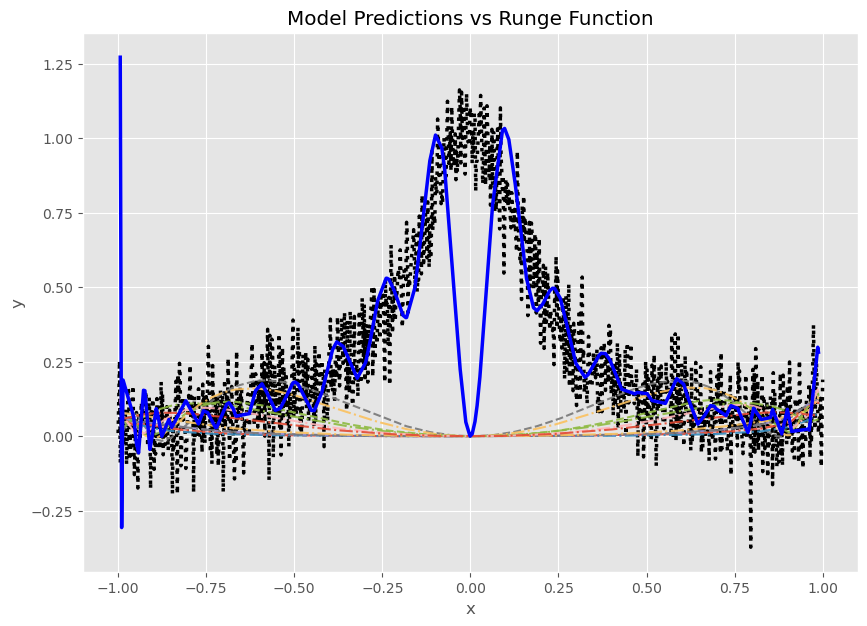

In [12]:
# Plot the results from OLS and Ridge on the test data
plt.figure(figsize=(10, 7))
# Sort x_test and corresponding predictions for better plotting
sort_indices = np.argsort(x_test.flatten())
plt.plot(x_test[sort_indices], y_pred_ols[sort_indices], color='blue', label='OLS Prediction', zorder=5, linewidth=2.5)
plt.plot(x_test[sort_indices], y_pred_gd_ols[sort_indices], color='blue', label='GD OLS Prediction', zorder=8, linewidth=2.5, linestyle='--')
# Also plot the true function, however we need to sort x for this
sort_indices_full = np.argsort(x.flatten())
plt.plot(x[sort_indices_full], y[sort_indices_full], color='black', linestyle=':', label='Runge Function', linewidth=2.5)
for method in methods:
    plt.plot(x_test[sort_indices], X_test[sort_indices] @ results[method]['theta_OLS'], label=f'GD OLS ({method})', linewidth=1.5, linestyle='--', alpha=0.9)
    plt.plot(x_test[sort_indices], X_test[sort_indices] @ results[method]['theta_Ridge'], label=f'GD Ridge ({method})', linewidth=1.5, linestyle='-.', alpha=0.9)
    plt.plot(x_test[sort_indices], X_test[sort_indices] @ results[method]['theta_Lasso'], label=f'GD Lasso ({method})', linewidth=1.5, linestyle='-.', alpha=0.9)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Model Predictions vs Runge Function")
#plt.legend()
plt.show()

## Stochastic

In [ ]:
results = {}
for method in methods:
    theta_OLS, cost_history_OLS     = stochastic_gradient_descent_advanced(X_train, y_train, method=method, lr_method='ols', learning_rate=learning_rate, n_iterations=n_iterations, tol=tolerance, use_tol=use_tol, beta=beta, beta1=beta1, beta2=beta2, epsilon=epsilon, lambda_=lambda_, batch_size=batch_size)    
    theta_Ridge, cost_history_Ridge = stochastic_gradient_descent_advanced(X_train, y_train, method=method, lr_method='ridge', learning_rate=learning_rate, n_iterations=n_iterations, tol=tolerance, use_tol=use_tol, beta=beta, beta1=beta1, beta2=beta2, epsilon=epsilon, lambda_=lambda_, batch_size=batch_size)    
    theta_Lasso, cost_history_Lasso = stochastic_gradient_descent_advanced(X_train, y_train, method=method, lr_method='lasso', learning_rate=learning_rate, n_iterations=n_iterations, tol=tolerance, use_tol=use_tol, beta=beta, beta1=beta1, beta2=beta2, epsilon=epsilon, lambda_=lambda_, batch_size=batch_size)    
    y_pred_OLS = X_test @ theta_OLS
    y_pred_Ridge = X_test @ theta_Ridge
    y_pred_Lasso = X_test @ theta_Lasso
    mse_OLS = MSE(y_test, y_pred_OLS)
    r2_OLS = R2(y_test, y_pred_OLS)
    mse_Ridge = MSE(y_test, y_pred_Ridge)
    r2_Ridge = R2(y_test, y_pred_Ridge)
    mse_Lasso = MSE(y_test, y_pred_Lasso)
    r2_Lasso = R2(y_test, y_pred_Lasso)
    results[method] = {
        'theta_OLS'         : theta_OLS,
        'cost_history_OLS'  : cost_history_OLS,
        'mse_OLS'           : mse_OLS,
        'r2_OLS'            : r2_OLS,
        'theta_Ridge'       : theta_Ridge,
        'cost_history_Ridge': cost_history_Ridge,
        'mse_Ridge'         : mse_Ridge,
        'r2_Ridge'          : r2_Ridge,
        'theta_Lasso'       : theta_Lasso,
        'cost_history_Lasso': cost_history_Lasso,
        'mse_Lasso'         : mse_Lasso,
        'r2_Lasso'          : r2_Lasso
    }
    print(f"OLS   : {method}: MSE = {mse_OLS:.6f}, R2 = {r2_OLS:.6f}")
    print(f"Ridge :{method}: MSE = {mse_Ridge:.6f}, R2 = {r2_Ridge:.6f}")
    print(f"Lasso :{method}: MSE = {mse_Lasso:.6f}, R2 = {r2_Lasso:.6f}")
    print()

c:\Users\Ingvild\Desktop\FYS-STK-PROJ-1\Project_1_FYSSTK\Code\functions.py:513: RuntimeWarning: overflow encountered in square
  cost = (1/n_samples) * np.sum((X_ @ theta - y_)**2)
c:\Users\Ingvild\Desktop\FYS-STK-PROJ-1\Project_1_FYSSTK\Code\functions.py:519: RuntimeWarning: invalid value encountered in scalar subtract
  if use_tol and i > 0 and abs(cost_history[-2] - cost) < tol:
c:\Users\Ingvild\Desktop\FYS-STK-PROJ-1\Project_1_FYSSTK\Code\functions.py:513: RuntimeWarning: invalid value encountered in matmul
  cost = (1/n_samples) * np.sum((X_ @ theta - y_)**2)
c:\Users\Ingvild\Desktop\FYS-STK-PROJ-1\Project_1_FYSSTK\Code\functions.py:515: RuntimeWarning: overflow encountered in square
  cost = (1/n_samples) * np.sum((X_ @ theta - y_)**2) + lambda_ * np.sum(theta**2)
c:\Users\Ingvild\Desktop\FYS-STK-PROJ-1\Project_1_FYSSTK\Code\functions.py:515: RuntimeWarning: invalid value encountered in matmul
  cost = (1/n_samples) * np.sum((X_ @ theta - y_)**2) + lambda_ * np.sum(theta**2)
c:\U

OLS   : gd: MSE = nan, R2 = nan
Ridge :gd: MSE = nan, R2 = nan
Lasso :gd: MSE = nan, R2 = nan



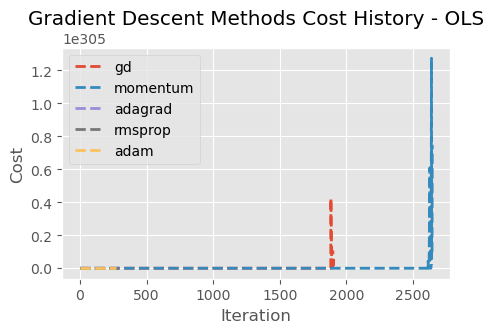

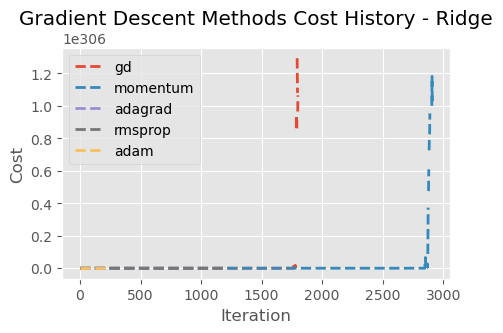

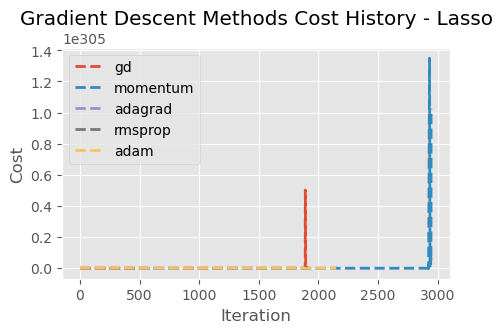

In [ ]:
# Plot cost history for all methods
plt.figure(figsize=(5, 3))
for method in methods:
    plt.plot(results[method]['cost_history_OLS'], label=method, linewidth=2, linestyle='--', alpha=1)
plt.title("Gradient Descent Methods Cost History - OLS")
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.legend()
plt.show()

plt.figure(figsize=(5, 3))
for method in methods:
    plt.plot(results[method]['cost_history_Ridge'], label=method, linewidth=2, linestyle='--', alpha=1)
plt.title("Gradient Descent Methods Cost History - Ridge")
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.legend()
plt.show()

plt.figure(figsize=(5, 3))
for method in methods:
    plt.plot(results[method]['cost_history_Lasso'], label=method, linewidth=2, linestyle='--', alpha=1)
plt.title("Gradient Descent Methods Cost History - Lasso")
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.legend()
plt.show()

In [ ]:
# # Plot the results from OLS and Ridge for the entire range of x
# plt.figure(figsize=(10, 7))
# x_plot = np.linspace(-1, 1, number_of_data_points).reshape(-1, 1)
# X_plot = PolynomialFeatures(degree=polynomial_degree, include_bias=True).fit_transform(x_plot)
# # Analytical solutions
# y_plot_ols   = X_plot @ theta_ols
# y_plot_ridge = X_plot @ beta_ridge
# # Gradient descent solutions
# y_plot_gd_ols   = X_plot @ theta_gd_ols
# y_plot_gd_ridge = X_plot @ beta_gd_ridge
# plt.plot(x, y_plot_ols, color='blue', label='OLS Prediction', zorder=5, linewidth=2.5)
# plt.plot(x, y_plot_ridge, color='red', label='Ridge Prediction', zorder=5, linewidth=1.5)
# plt.plot(x, y, color='black', linestyle=':', label='Runge Function', linewidth=2.5)
# for method in methods:
#     plt.plot(x, X_plot @ results[method]['theta_OLS'], label=f'GD OLS ({method})', linewidth=1.5, linestyle='--', alpha=0.9)
#     plt.plot(x, X_plot @ results[method]['theta_Ridge'], label=f'GD Ridge ({method})', linewidth=1.5, linestyle='-.', alpha=0.9)
#     plt.plot(x, X_plot @ results[method]['theta_Lasso'], label=f'GD Lasso ({method})', linewidth=1.5, linestyle='-.', alpha=0.9)
# plt.xlabel("x")
# plt.ylabel("y")
# plt.title("Model Predictions vs Runge Function")
# plt.legend()
# plt.show()  

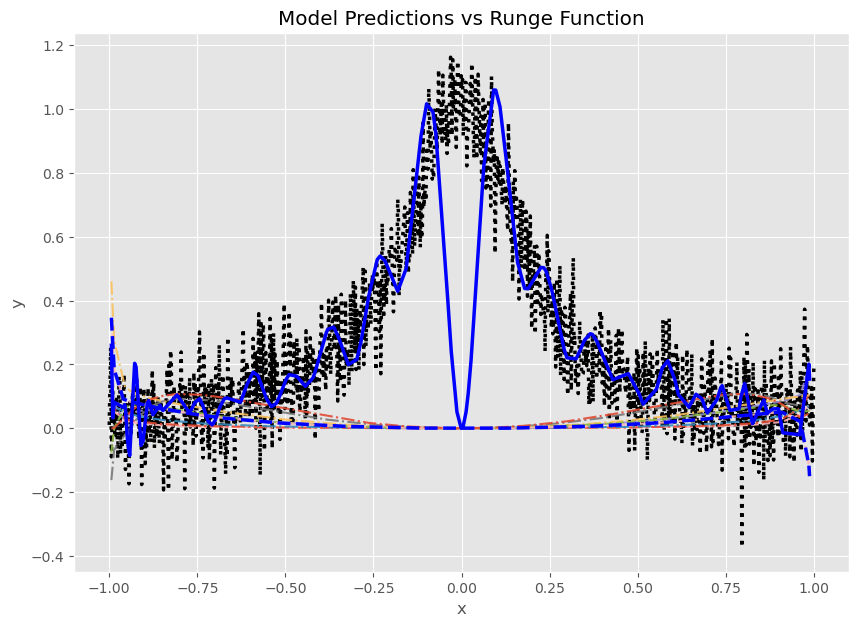

In [ ]:
# Plot the results from OLS and Ridge on the test data
plt.figure(figsize=(10, 7))
# Sort x_test and corresponding predictions for better plotting
sort_indices = np.argsort(x_test.flatten())
plt.plot(x_test[sort_indices], y_pred_ols[sort_indices], color='blue', label='OLS Prediction', zorder=5, linewidth=2.5)
plt.plot(x_test[sort_indices], y_pred_Ridge[sort_indices], color='blue', label='Ridge Prediction', zorder=8, linewidth=2.5, linestyle='--')
# Also plot the true function, however we need to sort x for this
sort_indices_full = np.argsort(x.flatten())
plt.plot(x[sort_indices_full], y[sort_indices_full], color='black', linestyle=':', label='Runge Function', linewidth=2.5)
for method in methods:
    plt.plot(x_test[sort_indices], X_test[sort_indices] @ results[method]['theta_OLS'], label=f'GD OLS ({method})', linewidth=1.5, linestyle='--', alpha=0.9)
    plt.plot(x_test[sort_indices], X_test[sort_indices] @ results[method]['theta_Ridge'], label=f'GD Ridge ({method})', linewidth=1.5, linestyle='-.', alpha=0.9)
    plt.plot(x_test[sort_indices], X_test[sort_indices] @ results[method]['theta_Lasso'], label=f'GD Lasso ({method})', linewidth=1.5, linestyle='-.', alpha=0.9)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Model Predictions vs Runge Function")
#plt.legend()
plt.show()